<img src="./logo.png">
<h2><center>MScFE 630 Computational Finance<br><br>Group Work Project<br><br>August 6, 2019<br><br><small><i>Gustavo Campos - gustavoc82@me.com<br>Hoang Dinh - hoangdinh.2710@gmail.com<br>Bosco Keown - bosco.keown@gmail.com</i></small></center></h2>
<h2><center>Abstract</center></h2>

The goal of this submission is to price a vanilla European call option, allowing the volatility to vary as in the Heston Model. We first calculate an option price using the Heston Model in a simple Fourier Series approximation. We follow that by simulating share price paths via a Constant Elasticity of Variance (CEV) Model. The CEV Model is then updated with Monte Carlo estimations plus standard deviations of these estimates for the price of the vanilla call option. Finally, the Monte Carlo estimations are plotted with respect to sample size, along with three standard deviations of error bounds.

<b><i>Keywords:</i></b> Heston, CEV, Fourier, Monte Carlo.

# Introduction

The Heston Model was developed by Steven L. Heston in 1993 and is a stochastic volatility model that actually models variance, the assumption with this model being that the volatility of the asset is not constant or deterministic but follows a random process. Constant Elasticity of Variance, developed by John Cox in 1975 is another stochastic volatility model. In statistics, stochastic volatility models are those in which the variance of a stochastic process is itself randomly distributed and governed by the price level of the underlying security, the tendency of volatility to revert to some long-run mean value, and the variance of the volatility process itself, among other factors.

# Pricing a Vanilla European Call Option

## Part 1 
Using a simple Fourier pricing technique (using $N = 100$ intervals, and using an effective upper bound of integration of 30), price a vanilla call option assuming that the underlying share follows the Heston model dynamics. Use the parameter values from the previous section: 

- Risk-free continuously-compounded interest rate, $r = 8\%$
- Strike price, $K = \$100$
- Initial stock price, $S_0 = \$100$
- Time to maturity, $T = 1$ year
- Stock volatility, $\sigma = 30\%$ 

As well as the following parameter values:

- $\upsilon_0 = 0.06$
- $\kappa = 9$
- $\theta = 0.06$
- $\rho = −0.4$

The Heston Model makes the assumption that the price of an asset at time $t$, $S_{t}$ is determined by the Stochastic Differential Equation:

$$ d S_{t}=\mu S_{t} d t+\sqrt{\nu_{t}} S_{t} d W_{t}^{1} $$  

$W_{t}^{1}$ is a standard Brownian motion, and the volatility term, $v_{t}$
follows a Cox-Ingersoll-Ross, or square-root process, defined by: 

$$ d v_{t}=\kappa\left(\theta-v_{t}\right) d t+\sigma \sqrt{v_{t}} d W_{t}^{2} $$

where $W_{t}^{2}$ is a standard Brownian motion and has correlation $\rho$ with $W_{t}^{1}$. Note that $\kappa$
the variance process is stochastic, and not the volatility process. By doing this, the volatility will always be positive.

In the Heston Model, the characteristic function of $\log \left(S_{T}\right), s_{T}$, is given by:

$$ \phi_{s_{T}}=\exp \left(C(\tau ; u)+D(\tau ; u) v_{t}+i u \log \left(S_{t}\right)\right) $$ where:

\begin{array}{c}{C(\tau ; u)=r i \tau u+\theta \kappa\left[\tau x_{-}-\frac{1}{a} \log \left(\frac{1-g e^{d \tau}}{1-g}\right)\right]} \\ {D(\tau ; u)=\left(\frac{1-e^{d \tau}}{1-g e^{d \tau}}\right) x_{-}}\end{array}

We compute this function here, by using the intermediate formulae:

$$
\begin{array}{c}{g=\frac{x_{-}}{x_{+}}} \\ {x_{ \pm}=\frac{b \pm d}{2 a}} \\ {d=\sqrt{b^{2}-4 a c}} \\ {c=-\frac{u^{2}+u i}{2}} \\ {b=\kappa-\rho \sigma i u} \\ {a=\frac{\sigma^{2}}{2}}\end{array}
$$

In order to implement this model in Python, let's define the class that carries and initialize the relevant parameters of an option.

In [1]:
# import libraries
import pandas as pd
import numpy as np
from scipy import log,exp,sqrt,stats 
from scipy.stats import ncx2, norm
from matplotlib import pyplot as plt

%matplotlib inline
np.random.seed(0)

#-----------------------------------------------
# option class 
#-----------------------------------------------
class Option:
    """parameters"""
    def __init__(self, S = 100.0, v = 0.3, r = 0.08, T = 1.0, K = 100.0, N = 12):
        """constructor"""
        """Stock parameters"""
        self.S = S                     # initial asset price
        self.v = v                     # volatility (annualized) 
        self.r = r                     # 10 years risk free rate
        self.T = T                     # years until maturity
        self.K = K                     # strike price
        self.N = N                     # number of discrete time points
        self.delta_t = self.T / self.N # timestep 
        
    def __str__(self):
        """print parameters"""
        return "---------------------------------------------\n" \
            + "Parameters of the Option:\n" \
            + "---------------------------------------------\n" \
            + "Initial Asset Price = " + str(self.S) + "\n" \
            + "Volatility = " + str(100*self.v) + "%\n" \
            + "Risk-Free 10 Years Treasury Rate = " + str(100*self.r) + "%\n" \
            + "Years Until Expiration = " + str(self.T) + " years\n" \
            + "Strike Price = " + str(self.K) + "\n" \
            + "Discrete time points = " + str(self.N) + "\n" \
            + "---------------------------------------------"
    
    """Analitical call price"""
    def analytic_call_price(self):
        d1=(log(self.S/self.K)+(self.r+self.v**2/2.)*self.T)/(self.v*sqrt(self.T)) 
        d2 = d1-self.v*sqrt(self.T)
        return self.S*norm.cdf(d1) - self.K*exp(-self.r*self.T)*norm.cdf(d2)

# option parameters
S = 100.0                              # initial asset price
v = 0.3                                # volatility (annualized) 
r = 0.08                               # 10 year risk free rate
T = 1.0                                # years until maturity
K = 100.0                              # strike price
N = 12                                 # number of discrete time points ("monthly simulations")

# create option object
opt = Option(S, v, r, T, K, N)
print(opt)

---------------------------------------------
Parameters of the Option:
---------------------------------------------
Initial Asset Price = 100.0
Volatility = 30.0%
Risk-Free 10 Years Treasury Rate = 8.0%
Years Until Expiration = 1.0 years
Strike Price = 100.0
Discrete time points = 12
---------------------------------------------


Now, we create a Heston model class that contains all the necessaries parameters. In this way, we define a few functions so that we can create a function (based on these other functions) for the characteristic function. The only variations are for the $\texttt{log_char}$ function which is just $\phi_{s_T}$, and the $\texttt{adj_char}$ function which is just $\frac{\phi_{s_T}(u-i)}{\phi_{s_T}(-i)}$.

In [2]:
#-----------------------------------------------
# heston class 
#-----------------------------------------------
class Heston:
    """parameters"""
    def __init__(self, Option, v0 = 0.06, k = 9, t = 0.06, rho = -0.4):
        """constructor"""
        """Heston parameters"""
        self.opt = Option              # Option 
        self.v0 = v0                   # Initial volatility
        self.k = k                     # kappa
        self.t = t                     # theta
        self.rho = rho                 # rho
        
        self.a = self.opt.v**2/2.
        
    def __str__(self):
        """print parameters"""
        return "---------------------------------------------\n" \
            + "Heston Model Parameters:\n" \
            + "---------------------------------------------\n" \
            + "V0 = " + str(self.v0) + "\n" \
            + "Kappa = " + str(self.k) + "\n" \
            + "Theta = " + str(self.t) + "\n" \
            + "Rho = " + str(self.rho) + "\n" \
            + "---------------------------------------------"
    
    def b(self, u):
        return self.k - self.rho*self.opt.v*1j*u

    def c(self, u):
        return -(u**2 + 1j*u) / 2.

    def d(self, u):
        return sqrt(self.b(u)**2 - 4*self.a*self.c(u))

    def xminus(self, u):
        return (self.b(u)-self.d(u))/(2*self.a)

    def xplus(self, u):
        return (self.b(u) + self.d(u))/(2*self.a)

    def g(self, u):
        return self.xminus(u)/self.xplus(u)

    def C(self, u):
        val1 = self.opt.T*self.xminus(u)-log((1-self.g(u)*exp(-self.opt.T*self.d(u))) /(1-self.g(u)))/self.a
        return self.opt.r*self.opt.T*1j*u + self.t*self.k*val1

    def D(self, u):
        return (1-exp(-self.opt.T*self.d(u)))*self.xminus(u) / (1-self.g(u)*exp(-self.opt.T*self.d(u)))

    """Characteristic functions"""
    def log_char(self, u):
        return exp(self.C(u) + self.D(u)*self.v0 + 1j*u*log(self.opt.S))

    def adj_char(self, u):
        return self.log_char(u-1j)/self.log_char(-1j)

# Heston parameters
v0 = 0.06                              # initial volatility
k = 9                                  # kappa
t = 0.06                               # theta
rho = -0.4                             # rho

# create option object
h = Heston(opt, v0, k, t, rho)
print(h)

---------------------------------------------
Heston Model Parameters:
---------------------------------------------
V0 = 0.06
Kappa = 9
Theta = 0.06
Rho = -0.4
---------------------------------------------


Using the characteristic function, we can compute the Fourier integrals $\phi_{s_{T}}$ and $ \phi_{S_{T}}^{S}(u)$ after applying Gil-Palaez and discretization. Knowing this, we can calculate the analytical price for the vanilla call option using a simple Fourier pricing technique but this time we assume that the underlying share follows the Heston model dynamics, and compare it with the closed-form solution.

In [3]:
# set t_max, N, delta and t_n
t_max = 30     # maximum integral bound
N = 100        # rectangles to approximate the integral
delta_t = t_max/N
t_n = (np.linspace(1,N,N) - 1/2)*delta_t

# approximate integral estimates
first_integral = sum((((exp(-1j*t_n*log(K))*h.adj_char(t_n)).imag)/t_n)*delta_t)
second_integral = sum((((exp(-1j*t_n*log(K))*h.log_char(t_n)).imag)/t_n)*delta_t)

# estimating price using Fourier transform
fourier_call_val = opt.S*(1/2+first_integral/np.pi)-exp(-opt.r*opt.T)*opt.K*(1/2+second_integral/np.pi)
print("Heston Method Call Price Computed via Fourier Characteristic Integrals: $%.2f" % fourier_call_val)
print("Analytic (Black-Scholes) Call Price: $%.2f" % opt.analytic_call_price())  
print("Diff Fourier-Heston vs Analytical price: $%.2f" % (fourier_call_val - opt.analytic_call_price()))

Heston Method Call Price Computed via Fourier Characteristic Integrals: $13.73
Analytic (Black-Scholes) Call Price: $15.71
Diff Fourier-Heston vs Analytical price: $-1.98


The result is close, but not particularly close. Note that, in order to account for a potential discrepancy in the Module 5 course notes, we have also wondered if, since Heston models variance rather than volatility, it may not be appropriate to combine a $\sigma$ of 0.3 with a $v_{0}$ and $\theta$ of 0.06. Perhaps either the $\sigma$ value needs to be 0.2449, or the $v_{0}$ and $\theta$ need to be 0.09 because $\sigma$ is the square root of variance. But this is just a hypothesis; it's possible that this Heston model is quite simple and does not appropriately model stochastic volatility evolution. 

Now, Let's plot the values of additional terms in integrand estimate, this shows how quickly the additional terms in the integral approximation go to zero. 

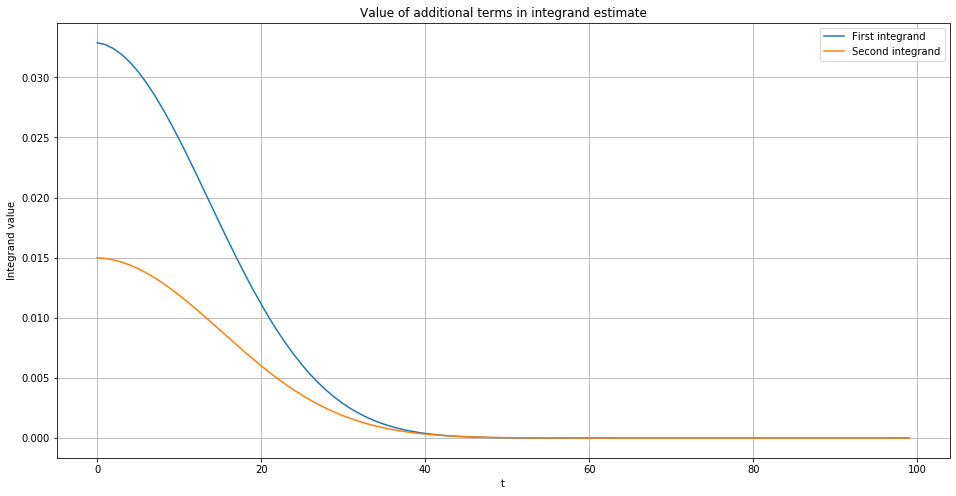

In [4]:
plt.subplots(figsize=(16, 8))
plt.title("Value of additional terms in integrand estimate")
plt.plot((((exp(-1j*t_n*log(K))*h.adj_char(t_n)).imag)/t_n)*delta_t, label="First integrand")
plt.plot((((exp(-1j*t_n*log(K))*h.log_char(t_n)).imag)/t_n)*delta_t, label="Second integrand")
plt.xlabel("t")
plt.ylabel("Integrand value")
plt.legend()
plt.grid()
plt.show()

Convergence is at around $t=40$. We will now simulate a share price path.

# Part 2

Assume that $\sigma (t_i,t_{i+1}) = \sigma(S_{ti})^{\gamma-1}$ where $\sigma = 0.3$ and $\gamma = 0.75$. Using the formula below, simulate paths for the underlying share using sample sizes of 1000, 2000, …, 50000. Do monthly simulations for a period of a year. 

We can simulate the next step in a share price path using the following formula:

$$S_{t_{i+1}} = S_{t_i} e^{\left( r - \frac{\sigma^2 \left( t_i, t_{i+1} \right)}{2} \right) \, (t_{i+1}-t_i) \, + \, \sigma(t_i,t_{i+1}) \, \sqrt{t_{i+1} - t_i} \, Z}$$

where $S_{ti}$ is the share price at time $t_i, \sigma(t_i,t_{i+1})$ is the volatility for the period $[t_i,t_{i+1}], r$ is the risk-free interest rate, and $Z \sim N(0,1)$.

The Constant Elasticity of Variance (CEV) model proposes stock dynamics given by: 

$$dS_t=\mu S_t dt + \sigma SγtdWt,$$

where $\gamma$ and $\sigma$ are non-negative, and all other variables are defined as in the usual Black-Scholes model. If $\gamma = 1$, we are back to the standard Black-Scholes model. For $\gamma < 1$, stock volatility increases as prices decrease. If we were to express our stock dynamics as:

$$dS_t = \mu S_t dt + S_t\sigma(S_t,t)dW_t,$$

we would have that $\sigma(S_t,t) = \sigma S_t^{\gamma - 1}$. Note that we are attempting to run simulations using the CEV model. However, while the CEV model assumes that volatility is a continuous function of time and share price, we are making a simplifying assumption that volatility is constant over each simulation period.

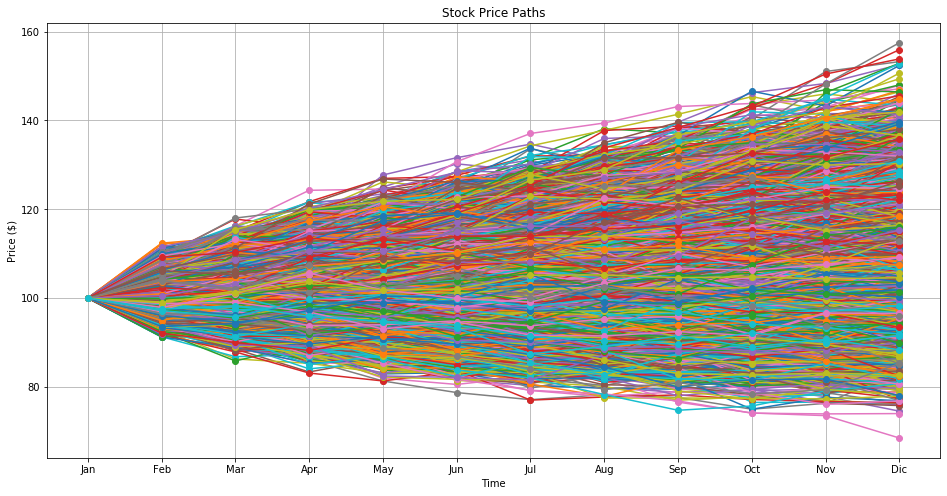

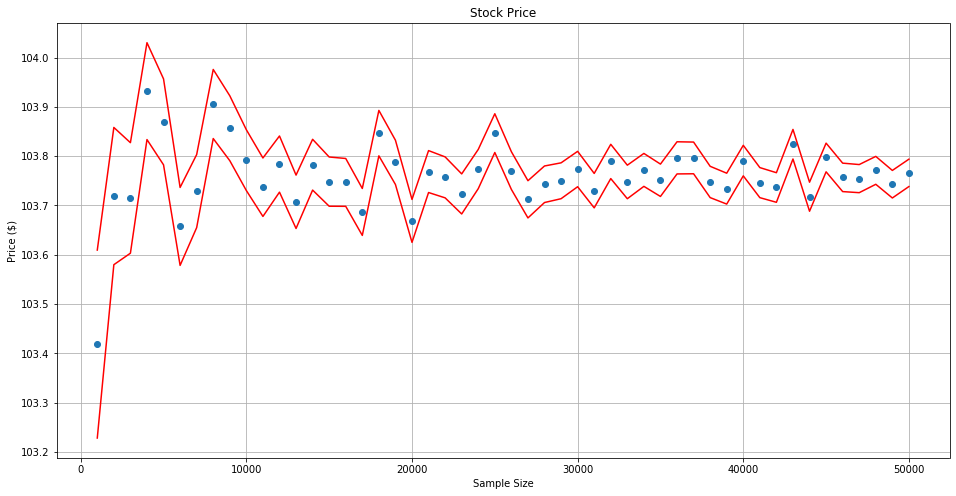

In [5]:
"""Simulating paths of stock price"""
def simulate(Option, simulations = [1000], gamma = 0.75):          
    stock = []                  # stock mean in each simulation
    stock_sd = []               # stock sd in each simulation
    for n in simulations:       # simulations loop
        stock_paths = []        # stock simulation paths
        for i in range(n):      # samples loop
            stock_path = [] 
            S_j = Option.S
            for j in range(Option.N):
                stock_path.append(S_j)
                v_dt = Option.v*(S_j)**(gamma-1)
                S_j *= exp((Option.r-1/2*(v_dt**2))*Option.delta_t + v_dt*sqrt(Option.delta_t)*norm.rvs()) 

            """Saving the stock path"""
            stock_paths.append(stock_path)

        """stock mean and sd in each simulation"""
        stock.append(np.mean(stock_paths))
        stock_sd.append(np.std(stock_paths) / np.sqrt(n*Option.N))
        
    dates = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dic"]
    plt.subplots(figsize=(16, 8))
    paths = pd.DataFrame(stock_paths, columns = dates)
    for index, row in paths.iterrows():
        plt.plot(row, marker='o')

    plt.title('Stock Price Paths')
    plt.xlabel('Time')
    plt.ylabel('Price ($)')
    plt.grid(True)
    plt.show()
    
    """Plot stock price means and sd vs numbers of simulations"""
    plt.subplots(figsize=(16, 8))    
    plt.plot(simulations, stock,'o')
    plt.plot(simulations, stock + 3*np.array(stock_sd),'r')
    plt.plot(simulations, stock - 3*np.array(stock_sd),'r')
    plt.title('Stock Price')
    plt.xlabel('Sample Size')
    plt.ylabel('Price ($)')
    plt.grid()
    plt.show()
        
# run simulation
n = [x for x in range(1000,50001,1000)] # simulations list
# n = [x for x in range(100,5001,100)]     # simulations list
# n = [x for x in range(10,501,10)]     # simulations list
gamma = 0.75
simulate(opt,n,gamma)

The price path for 1 year period is constructed using monthly simulation. To simplify the CEV model we assume constant initial volatility $\sigma_0 = 0.3$ and constant $\gamma = 0.75$. However, the volatility at each time step is different as its value depends on the corresponding stock price: $\sigma (t_i,t_{i+1}) = \sigma(S_{ti})^{\gamma-1}$. Therefore, we are able to generate random volatility at each time-step even with the simplifying assumption. 

From the above figure, the stock paths created an upper and lower boundary of \\$160 and \\$75 within the one year period. The corresponding boundary for P/L is 60% and -25% from the initial price. The confidence interval rapidly expanded after each time-step. Based on the simulation result, we observed a positive mean and negative skew from the stock return distribution. 

In the second plot, we can see that the prices also have a positive tendency, and the standard deviation decrease as the numbers of simulations increase. The value of simulate stock price converge to \\$103.7 approximately.

# Part 3

Augment your code in part 2 to calculate Monte Carlo estimates, as well as the standard deviations for these estimates, for the price of a vanilla call option (with the same strike term as in Submission 1). Plot the Monte Carlo estimates generated in part 3 with respect to sample size, as well as three standard deviation error bounds around these estimates.

The CEV model can be simulated using Monte Carlo methods, particularly when the task for calculation of price paths (as developed earlier) is separated from  the task for calculating the option prices and standard deviations. A particular feature of the CEV model is that it captures the "leverage effect" which boils down to the fact that firms always have fixed costs to pay, no matter what their financial performance. If the stock price declines, volatility may increase especially with a decline in operating performance, and no change or reduction to the firm's fixed costs. One weakness of the CEV model is that it can allow the stock price to become negative, which is not a real-life scenario.

In order to perform this task, we include in the simulations done in part 2, the call payoff equation and saves its values in each simulation. We use the payoff vector and discount factor to compute the price of the option with the same strike term as in Submission 1, then calculate Monte Carlo estimates as well as the standard deviations. Finally, we plot the results with respect to sample size. Here the resulting code and plot: 

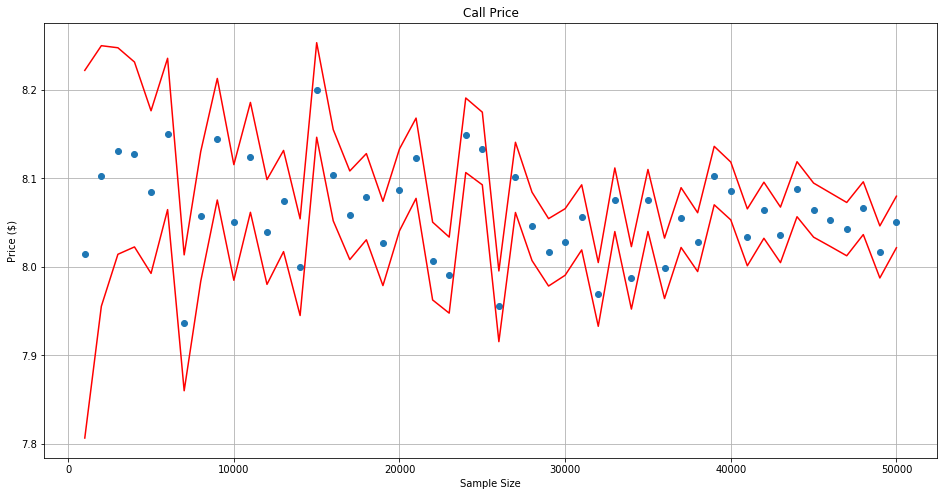

In [6]:
"""Calculate Monte Carlo estimates"""
def monte_carlo(Option, simulations = [1000], gamma = 0.75):          
    stock = []                  # stock mean in each simulation
    stock_sd = []               # stock sd in each simulation
    call = []                   # call price mean in each simulation
    call_sd = []                # call price sd in each simulation
    for n in simulations:       # simulations loop
        stock_paths = []        # stock simulation paths
        payoffs = []            # call payoffs
        for i in range(n):      # sample loop
            stock_path = [] 
            S_j = Option.S
            for j in range(Option.N):
                stock_path.append(S_j)
                v_dt = Option.v*(S_j)**(gamma-1)
                S_j *= exp((Option.r-1/2*(v_dt**2))*Option.delta_t + v_dt*sqrt(Option.delta_t)*norm.rvs()) 

            """Saving the stock path"""
            stock_paths.append(stock_path)
            
            """Call payoff""" 
            payoffs.append(np.maximum(stock_path[-1] - Option.K,0))

        """stock mean and sd in each simulation"""
        stock.append(np.mean(stock_paths))
        stock_sd.append(np.std(stock_paths) / np.sqrt(n*Option.N))
        
        """Uses payoff vector and discount factor to compute the price of the option""" 
        Vi = exp(-Option.r * Option.T) * np.array(payoffs, dtype=float)
        call.append(np.mean(Vi))
        call_sd.append(np.std(Vi) / np.sqrt(n*Option.N))
        
    """Plot call price vs numbers of simulations"""
    plt.subplots(figsize=(16, 8))    
    plt.plot(simulations, call,'o')
    plt.plot(simulations, call + 3*np.array(call_sd),'r')
    plt.plot(simulations, call - 3*np.array(call_sd),'r')
    plt.title('Call Price')
    plt.xlabel('Sample Size')
    plt.ylabel('Price ($)')
    plt.grid()
    plt.show()
        
# run monte carlo simulation
monte_carlo(opt,n,gamma)

The resulting plot shows that the error bounds around these estimates are reduced by an increase of the sample size in the Monte Carlo simulation, as expected. The call price converges to \\$8 price, and this is inconsistent with the value generate with the Black-Scholes model, but we have to consider that the Constant Elasticity of Variance (CEV) model proposes stock dynamics that does not depend on time, only on the stock price.  

# Conclusion

We successful implemented the Fourier Pricing Technique using Python to estimate the price of a vanilla European call with the Heston Model. The result is confirmed with the closed-form solution. We also generated the share price paths using the simplify CEV model. The simulated share prices are then used to calculate the call price. We found that the simulated call price converges to around \\$8 after 50,000 simulations. The simulated call price yields a significantly different value compared to both the closed-form solution and the Fourier model. The difference is likely subject to many factors. However, we believe that the primary reason is that the CEV model accounts for the change in volatility at each time steps and hence affects the price paths and the corresponding call prices. Indeed, we successfully evaluate the vanilla European call price using different methods: closed-form, Fourier and the last approach Monte-Carlo model which allows the volatility term to vary. Accounting for a continuous change of volatility during price evaluation appears to affect the estimation for the call price.  

# References

Heston, S. L. (1993). “*A Closed-form Solution for Options with Stochastic Volatility with Applications to Bond and Currency Options*”, The Review of Financial Studies 6(2): 327–343.

Hsu, Y.-L., Lin, T. and Lee, C. (2008). “*Constant Elasticity of Variance (CEV) Option Pricing Model: Integration and Detailed Derivation*”, Mathematics and Computers in Simulation 79(1): 60–71.